# Import Library & Read Data

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
%matplotlib inline

sns.set_style('whitegrid')
plt.rc('patch', edgecolor='black')
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 1.5})

In [ ]:
uploaded = files.upload()

Saving Diabetes.csv to Diabetes.csv


In [ ]:
df = pd.read_csv('Diabetes.csv')

# Data Preparation

## Find hidden NaN value

In [ ]:
# Change 0 value with NaN
for i in ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]:
  df.loc[df[i] == 0,i] = np.nan

In [ ]:
# Check Data Null
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## EDA

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Diabetes Number
df.value_counts('Outcome')

Outcome
0    500
1    268
dtype: int64

In [ ]:
# Percentage Diabetes
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diabetes Diagnose')

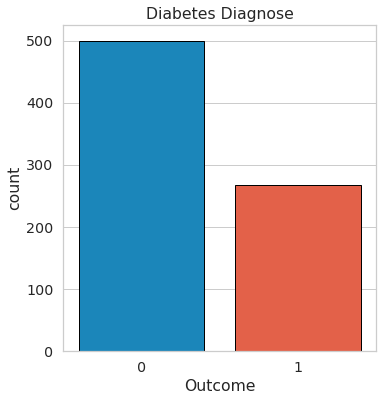

In [ ]:
plt.figure(figsize=(5,6))
sns.countplot(df['Outcome']).set_title('Diabetes Diagnose')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cd1d17a30>,
      dtype=object)

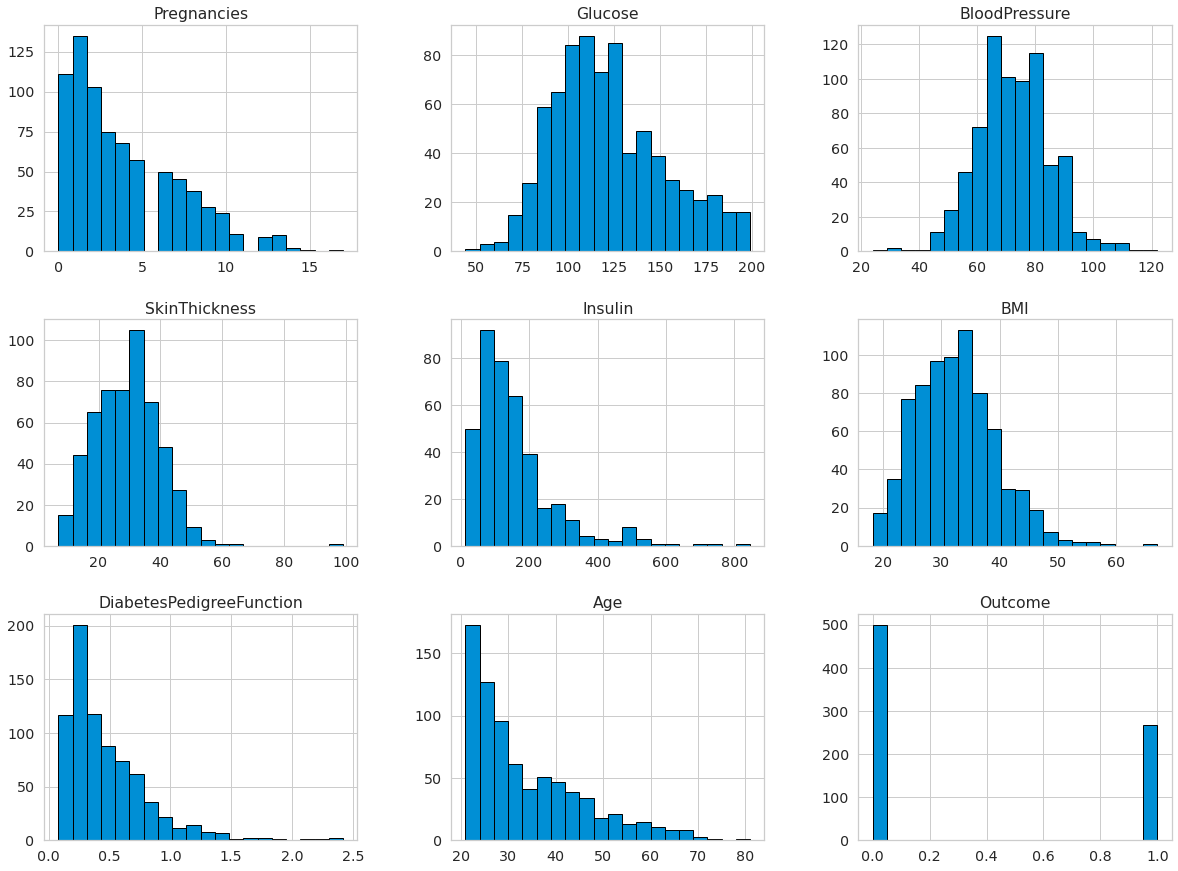

In [ ]:
df.hist(bins=20, figsize=(18,15))

- Distribusi Normal = Glucose, BloodPressure, Skin Thickness, BMI
- Menceng Kanan = Pregnancies, Insulin, DBPedigree, Age

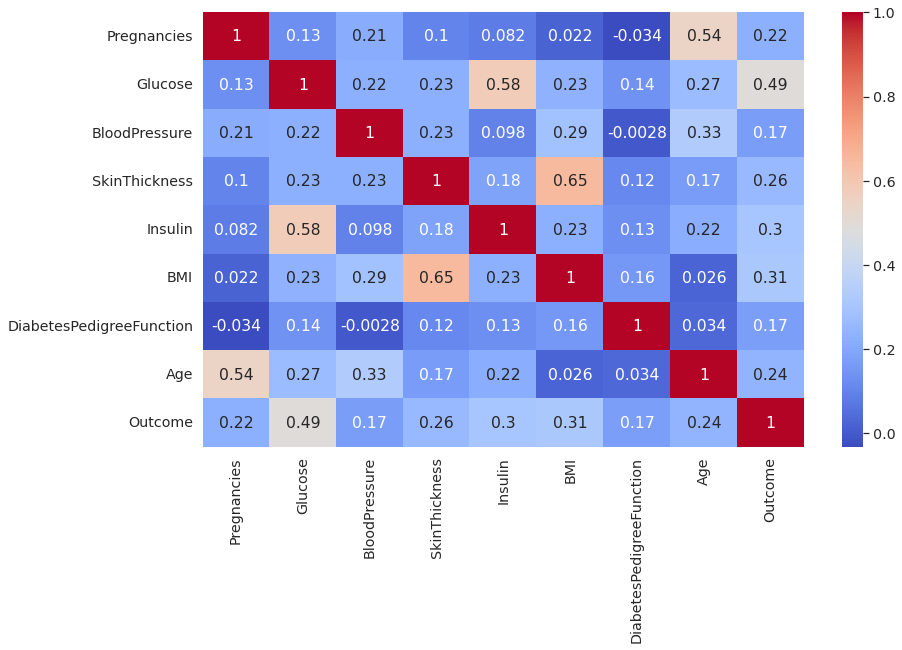

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Data Preprocessing

### Duplicate Value

In [ ]:
# Check Duplicate
print(df.duplicated().sum())

0


### Missing Value

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Fill missing value of Glucose, BloodPressure, and BMI with mean (have normal distribution)

In [ ]:
for i in ['Glucose','BloodPressure','BMI']:
  df[i].fillna(df[i].mean(), inplace=True)

Fill Missing Values of Insulin and SkinThickness by using KNN method

In [ ]:
df_KNN = pd.get_dummies(df[["Insulin","SkinThickness"]], drop_first=True)

In [ ]:
# Standardization Variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_KNN = pd.DataFrame(scaler.fit_transform(df_KNN), columns=df_KNN.columns)
df_KNN.head()

,Insulin,SkinThickness
0,NaN,0.304348
1,NaN,0.239130
2,NaN,NaN
3,0.096154,0.173913
4,0.185096,0.304348


In [ ]:
# Implement KNN Method
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

df_KNN = pd.DataFrame(imputer.fit_transform(df_KNN), columns=df_KNN.columns)
df_KNN.head()

,Insulin,SkinThickness
0,0.240144,0.304348
1,0.243269,0.239130
2,0.170130,0.240798
3,0.096154,0.173913
4,0.185096,0.304348


In [ ]:
# Undo Standardization
df_KNN = pd.DataFrame(scaler.inverse_transform(df_KNN), columns=df_KNN.columns)
df_KNN.head()

,Insulin,SkinThickness
0,213.800000,35.00000
1,216.400000,29.00000
2,155.548223,29.15342
3,94.000000,23.00000
4,168.000000,35.00000


In [ ]:
df["Insulin"] = df_KNN["Insulin"]
df["SkinThickness"]= df_KNN["SkinThickness"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ccccd69a0>,
      dtype=object)

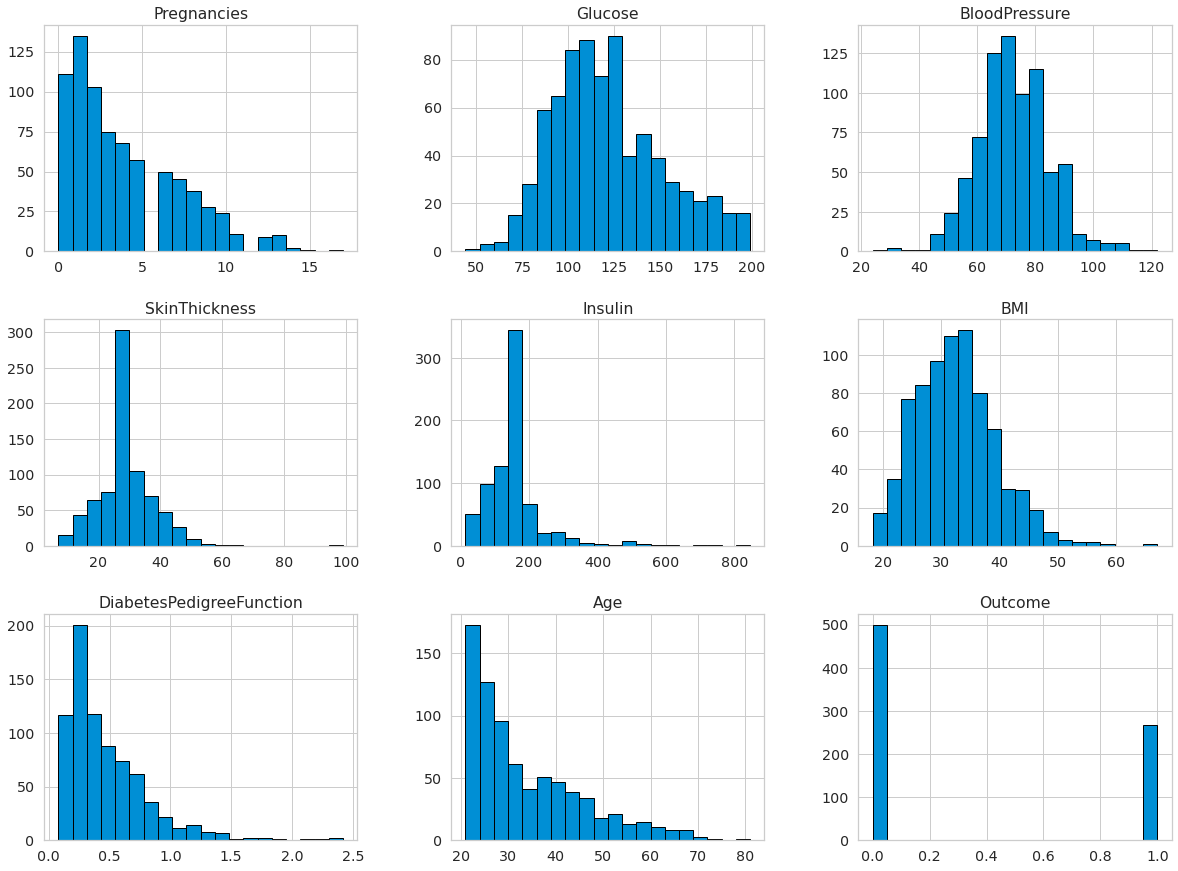

In [ ]:
df.hist(bins=20, figsize=(18,15))

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Outliers

In [ ]:
# Inter Quartile Range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

outliers = ((df < low_limit ) | (df > high_limit))
outliers.sum()

Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness               87
Insulin                     94
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

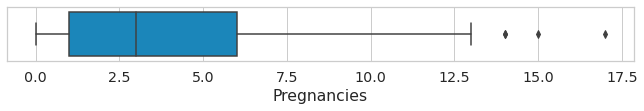

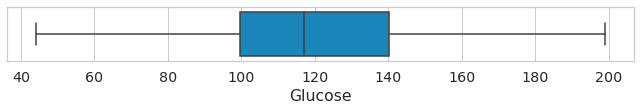

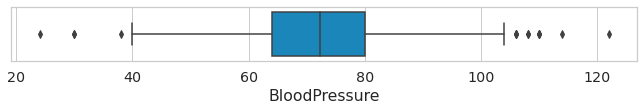

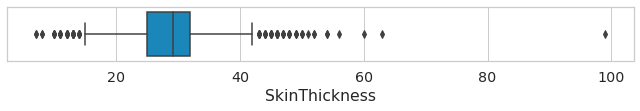

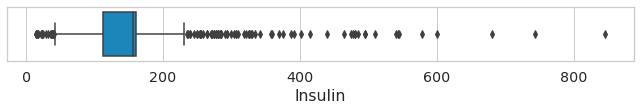

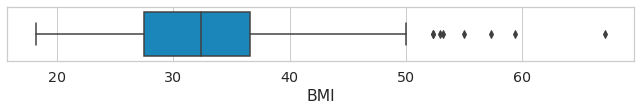

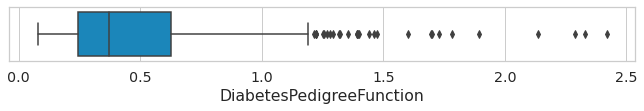

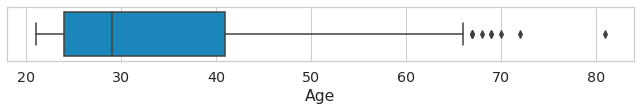

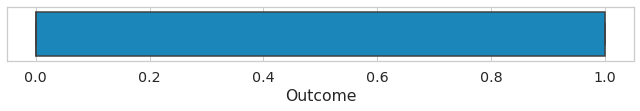

In [ ]:
for column in df.columns:
        plt.figure(figsize=(10,1))
        sns.boxplot(data=df[df.columns], x=column)

In [ ]:
# Outliers > Median
df_OutMed = df[['Pregnancies']]
for i in df_OutMed.columns:
  median = df_OutMed.median()
  df_OutMed.mask(outliers, other=median, axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:9032: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(cond, other, inplace, axis, level, errors=errors)


In [ ]:
# Outliers > Mean
df_OutMean = df[['SkinThickness', 'Insulin','DiabetesPedigreeFunction']]
for i in df_OutMean.columns:
  mean = df_OutMean.mean()
  df_OutMean.mask(outliers, other=mean, axis=1, inplace=True)

In [ ]:
df['Pregnancies'] = df_OutMed['Pregnancies']
df['SkinThickness'] = df_OutMean['SkinThickness']
df['Insulin'] = df_OutMean['Insulin']
df['DiabetesPedigreeFunction'] = df_OutMean['DiabetesPedigreeFunction']

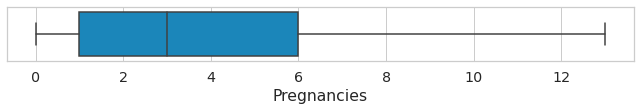

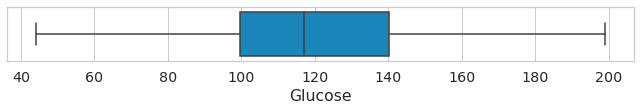

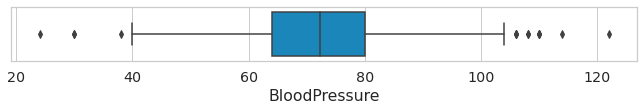

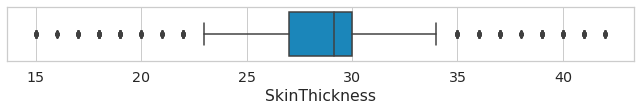

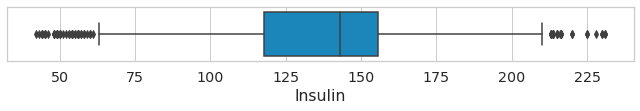

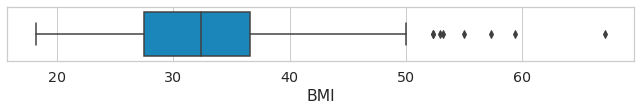

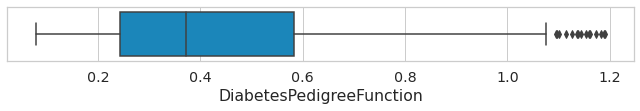

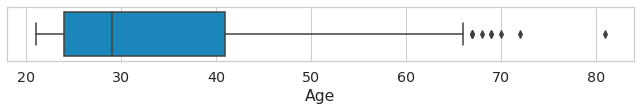

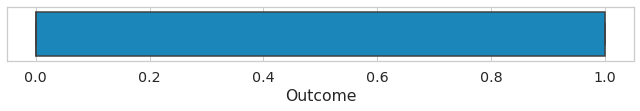

In [ ]:
for column in df.columns:
        plt.figure(figsize=(10,1))
        sns.boxplot(data=df[df.columns], x=column)

## Feature Engineering

### Classifying

In [ ]:
Age_Class = []
for i in df["Age"]:
    if 20 < i <= 30:
        Age_Class.append("Young")  
    elif 30 < i <= 44:
        Age_Class.append("Middle")  
    elif 44 < i <= 60:
        Age_Class.append("Adult")                     
    elif i > 50 :
        Age_Class.append("Elderly")    
    else:
        Age_Class.append(np.NaN)

In [ ]:
df['Age_Class'] = Age_Class

In [ ]:
def check (col):
  a = df[col].value_counts()
  b = df[col].value_counts(normalize=True)*100
  result = pd.concat([a,b], axis = 1, keys=['Counts','%'])
  return result

In [ ]:
check('Age_Class')

,Counts,%
Young,417,54.296875
Middle,218,28.385417
Adult,106,13.802083
Elderly,27,3.515625


In [ ]:
Glucose_Class = []
for i in df['Glucose']:
  if i < 70:
    Glucose_Class.append('Hipoglisemi')
  elif 70 <= i < 100:
    Glucose_Class.append('Normal')
  elif 100 <= i < 126:
    Glucose_Class.append('Imparied')
  elif i >= 126 :
    Glucose_Class.append('Hiperglisemi')
  else:
        Glucose_Class.append(np.NaN)

In [ ]:
df['Glucose_Class'] = Glucose_Class

In [ ]:
check('Glucose_Class')

,Counts,%
Hiperglisemi,297,38.671875
Imparied,279,36.328125
Normal,181,23.567708
Hipoglisemi,11,1.432292


In [ ]:
BMI_Class = []
for i in df["BMI"]:
    if i < 16:
        BMI_Class.append("Over Weak")  
    elif 16 <= i < 18.5:
        BMI_Class.append("Weak")  
    elif 18.5 <= i < 25:
        BMI_Class.append("Normal")
    elif 25 <= i < 30:
        BMI_Class.append("Over Weight")
    elif 30 <= i < 35:
        BMI_Class.append("1st Obese")
    elif 35 <= i < 45:
        BMI_Class.append("2nd Obese")                      
    elif i >= 45 :
        BMI_Class.append("3rd Obese")    
    else:
        BMI_Class.append(np.NaN)

In [ ]:
df['BMI_Class'] = BMI_Class

In [ ]:
check('BMI_Class')

,Counts,%
1st Obese,235,30.598958
2nd Obese,212,27.604167
Over Weight,179,23.307292
Normal,102,13.281250
3rd Obese,36,4.687500
Weak,4,0.520833


In [ ]:
BloodPressure_Class = []
for i in df['BloodPressure']:
  if i < 70:
    BloodPressure_Class.append('Low')
  elif 70 <= i < 90:
    BloodPressure_Class.append('Normal')
  elif i >= 90 :
    BloodPressure_Class.append('High')
  else:
        BloodPressure_Class.append(np.NaN)

In [ ]:
df['BloodPressure_Class'] = BloodPressure_Class

In [ ]:
check('BloodPressure_Class')

,Counts,%
Normal,425,55.338542
Low,283,36.848958
High,60,7.812500


In [ ]:
Insulin_Class = []
for i in df['Insulin']:
  if i < 120:
    Insulin_Class.append('Normal')
  elif i >= 120 :
    Insulin_Class.append('Abnormal')
  else:
        Insulin_Class.append(np.NaN)

In [ ]:
df['Insulin_Class'] = Insulin_Class

In [ ]:
check('Insulin_Class')

,Counts,%
Abnormal,566,73.697917
Normal,202,26.302083


In [ ]:
Pregnancies_Class = []
for i in df['Pregnancies']:
  if i < 1:
    Pregnancies_Class.append('Un-Pregnant')
  elif 1 <= i <= 5:
    Pregnancies_Class.append('Normal')
  elif 5 < i <= 10:
    Pregnancies_Class.append('High')
  elif i >= 10 :
    Pregnancies_Class.append('Very High')
  else:
        Pregnancies_Class.append(np.NaN)

In [ ]:
df['Pregnancies_Class'] = Pregnancies_Class

In [ ]:
check('Pregnancies_Class')

,Counts,%
Normal,442,57.552083
High,185,24.088542
Un-Pregnant,111,14.453125
Very High,30,3.906250


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Class,Glucose_Class,BMI_Class,BloodPressure_Class,Insulin_Class,Pregnancies_Class
0,6,148.0,72.0,35.00000,213.800000,33.6,0.627000,50,1,Adult,Hiperglisemi,1st Obese,Normal,Abnormal,High
1,1,85.0,66.0,29.00000,216.400000,26.6,0.351000,31,0,Middle,Normal,Over Weight,Low,Abnormal,Normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672000,32,1,Middle,Hiperglisemi,Normal,Low,Abnormal,High
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167000,21,0,Young,Normal,Over Weight,Low,Normal,Normal
4,0,137.0,40.0,35.00000,168.000000,43.1,0.429892,33,1,Middle,Hiperglisemi,2nd Obese,Low,Abnormal,Un-Pregnant


### EDA 2.0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diabetes x BloodPressure')

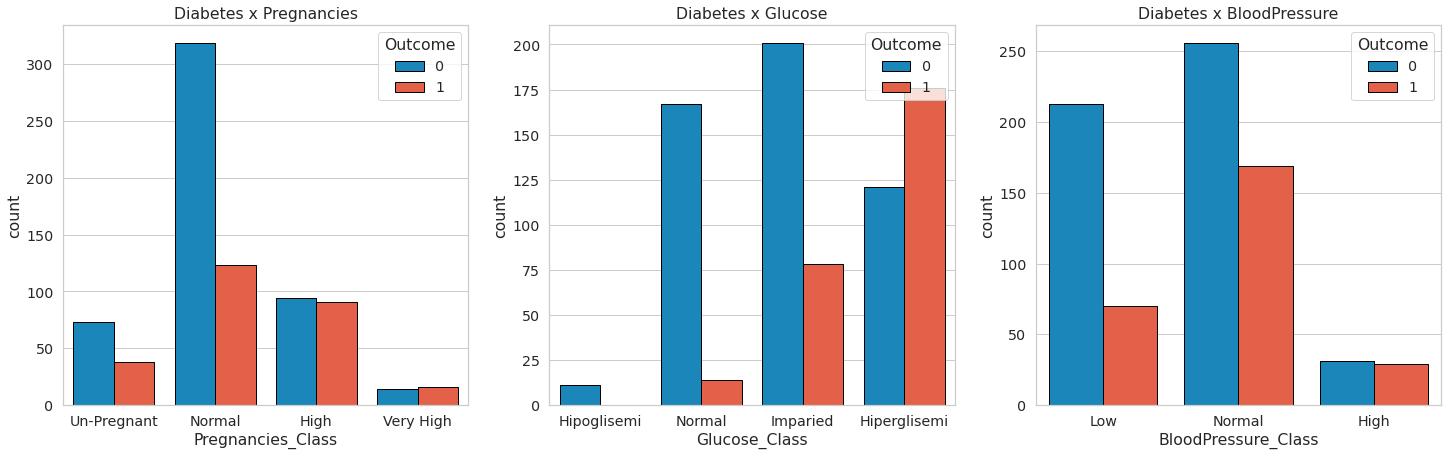

In [ ]:
f,ax=plt.subplots(1,3,figsize=(22,7))
# Outcome x Pregnancies
sns.countplot(df.Pregnancies_Class,hue=df.Outcome, order = ('Un-Pregnant','Normal','High','Very High'), ax=ax[0])
ax[0].set_title('Diabetes x Pregnancies')
# Outcome x Glucose
sns.countplot(df.Glucose_Class,hue=df.Outcome, order = ('Hipoglisemi','Normal','Imparied','Hiperglisemi'), ax=ax[1])
ax[1].set_title('Diabetes x Glucose')
# Outcome x BloodPressure
sns.countplot(df.BloodPressure_Class,hue=df.Outcome, order = ('Low','Normal','High'), ax=ax[2])
ax[2].set_title('Diabetes x BloodPressure')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diabetes x Age')

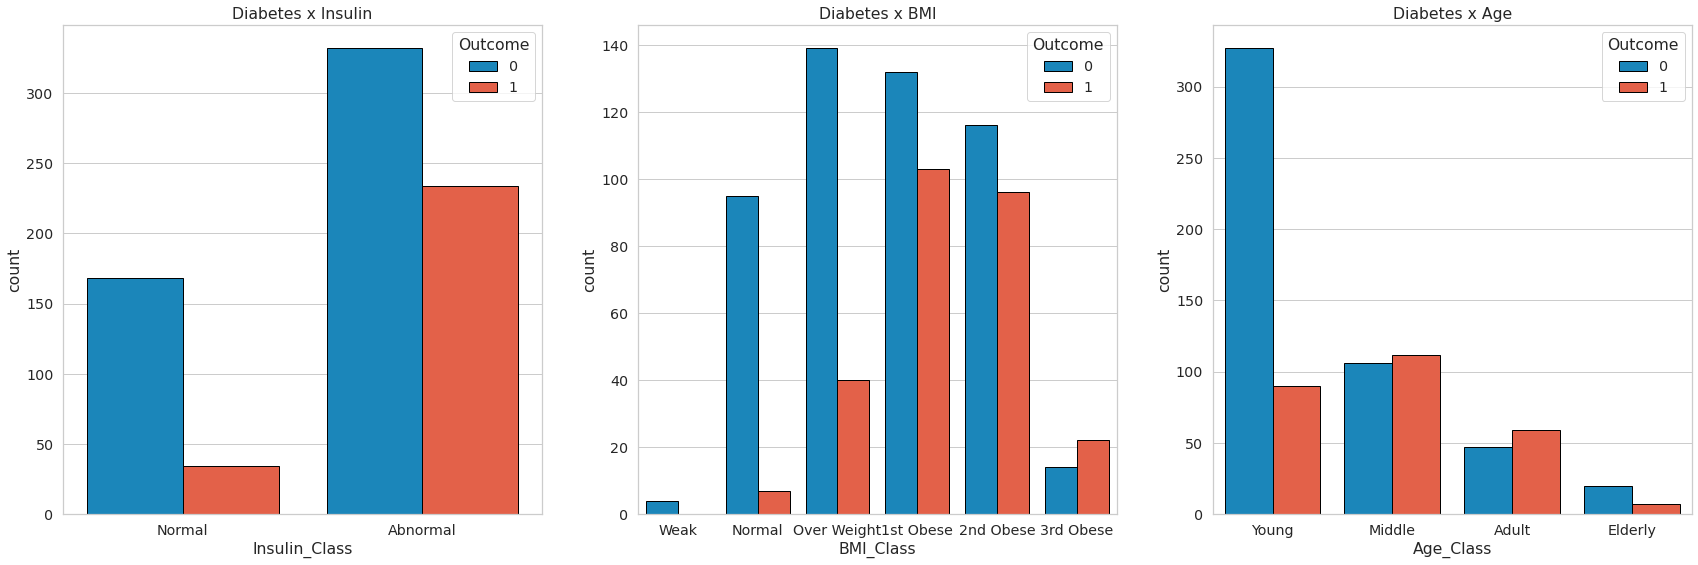

In [ ]:
f,ax=plt.subplots(1,3,figsize=(26,9))
# Outcome x Insulin
sns.countplot(df.Insulin_Class,hue=df.Outcome, order = ('Normal','Abnormal'), ax=ax[0])
ax[0].set_title('Diabetes x Insulin')
# Outcome x BMI
sns.countplot(df.BMI_Class,hue=df.Outcome, order = ('Weak','Normal','Over Weight','1st Obese','2nd Obese','3rd Obese'), ax=ax[1])
ax[1].set_title('Diabetes x BMI')
# Outcome x Age
sns.countplot(df.Age_Class,hue=df.Outcome, order = ('Young','Middle','Adult','Elderly'), ax=ax[2])
ax[2].set_title('Diabetes x Age')

### Standardization

In [ ]:
num_col = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_transform = scaler.fit_transform(num_col)

In [ ]:
X_transform = pd.DataFrame(X_transform,columns = num_col.columns)
X_transform.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.670968,0.489796,0.740741,0.908995,0.314928,0.493261,0.483333
1,0.076923,0.264516,0.428571,0.518519,0.922751,0.171779,0.245283,0.166667
2,0.615385,0.896774,0.408163,0.524201,0.600784,0.104294,0.533693,0.183333
3,0.076923,0.290323,0.428571,0.296296,0.275132,0.202454,0.079964,0.000000
4,0.000000,0.600000,0.163265,0.740741,0.666667,0.509202,0.316165,0.200000


### Encoder

In [ ]:
cat_col = df[['Pregnancies_Class','Glucose_Class','BloodPressure_Class','Insulin_Class','BMI_Class','Age_Class']]

In [ ]:
cat = pd.get_dummies(cat_col)

In [ ]:
cat.head()

,Pregnancies_Class_High,Pregnancies_Class_Normal,Pregnancies_Class_Un-Pregnant,Pregnancies_Class_Very High,Glucose_Class_Hiperglisemi,Glucose_Class_Hipoglisemi,Glucose_Class_Imparied,Glucose_Class_Normal,BloodPressure_Class_High,BloodPressure_Class_Low,...,BMI_Class_1st Obese,BMI_Class_2nd Obese,BMI_Class_3rd Obese,BMI_Class_Normal,BMI_Class_Over Weight,BMI_Class_Weak,Age_Class_Adult,Age_Class_Elderly,Age_Class_Middle,Age_Class_Young
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Pregnancies_Class_High         768 non-null    uint8
 1   Pregnancies_Class_Normal       768 non-null    uint8
 2   Pregnancies_Class_Un-Pregnant  768 non-null    uint8
 3   Pregnancies_Class_Very High    768 non-null    uint8
 4   Glucose_Class_Hiperglisemi     768 non-null    uint8
 5   Glucose_Class_Hipoglisemi      768 non-null    uint8
 6   Glucose_Class_Imparied         768 non-null    uint8
 7   Glucose_Class_Normal           768 non-null    uint8
 8   BloodPressure_Class_High       768 non-null    uint8
 9   BloodPressure_Class_Low        768 non-null    uint8
 10  BloodPressure_Class_Normal     768 non-null    uint8
 11  Insulin_Class_Abnormal         768 non-null    uint8
 12  Insulin_Class_Normal           768 non-null    uint8
 13  BMI_Class_1st Obese 

In [ ]:
target = df[['Outcome']]

In [ ]:
target.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
type(X_transform)

pandas.core.frame.DataFrame

In [ ]:
type(cat)

pandas.core.frame.DataFrame

In [ ]:
type(target)

pandas.core.frame.DataFrame

In [ ]:
new_df = pd.concat([X_transform, cat], axis=1)
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_Class_High,Pregnancies_Class_Normal,...,BMI_Class_1st Obese,BMI_Class_2nd Obese,BMI_Class_3rd Obese,BMI_Class_Normal,BMI_Class_Over Weight,BMI_Class_Weak,Age_Class_Adult,Age_Class_Elderly,Age_Class_Middle,Age_Class_Young
0,0.461538,0.670968,0.489796,0.740741,0.908995,0.314928,0.493261,0.483333,1,0,...,1,0,0,0,0,0,1,0,0,0
1,0.076923,0.264516,0.428571,0.518519,0.922751,0.171779,0.245283,0.166667,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0.615385,0.896774,0.408163,0.524201,0.600784,0.104294,0.533693,0.183333,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0.076923,0.290323,0.428571,0.296296,0.275132,0.202454,0.079964,0.000000,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.000000,0.600000,0.163265,0.740741,0.666667,0.509202,0.316165,0.200000,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.769231,0.367742,0.530612,0.510529,0.730159,0.300613,0.083558,0.700000,1,0,...,1,0,0,0,0,0,0,1,0,0
764,0.153846,0.503226,0.469388,0.444444,0.513228,0.380368,0.235400,0.100000,0,1,...,0,1,0,0,0,0,0,0,0,1
765,0.384615,0.496774,0.489796,0.296296,0.370370,0.163599,0.150045,0.150000,0,1,...,0,0,0,0,1,0,0,0,0,1
766,0.076923,0.529032,0.367347,0.524201,0.600784,0.243354,0.243486,0.433333,0,1,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pregnancies                    768 non-null    float64
 1   Glucose                        768 non-null    float64
 2   BloodPressure                  768 non-null    float64
 3   SkinThickness                  768 non-null    float64
 4   Insulin                        768 non-null    float64
 5   BMI                            768 non-null    float64
 6   DiabetesPedigreeFunction       768 non-null    float64
 7   Age                            768 non-null    float64
 8   Pregnancies_Class_High         768 non-null    uint8  
 9   Pregnancies_Class_Normal       768 non-null    uint8  
 10  Pregnancies_Class_Un-Pregnant  768 non-null    uint8  
 11  Pregnancies_Class_Very High    768 non-null    uint8  
 12  Glucose_Class_Hiperglisemi     768 non-null    uin

# Machine Learning

## Train-Test Split

In [ ]:
X = new_df
X.shape

(768, 31)

In [ ]:
y = target
y.shape

(768, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 123, stratify=y)

## Resampling SMOTE

In [ ]:
y_train.value_counts()

Outcome
0          350
1          187
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# define undersampling strategy
oversample = SMOTE(sampling_strategy=1)

# fit and apply the transform
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

Outcome
0          350
1          350
dtype: int64

## Model

In [ ]:
# membuat fungsi evaluasi model
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

### Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, random_state=12)
dtc.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=5, random_state=12)

In [ ]:
train_dt = evaluasi_model(dtc, X_train_smote, y_train_smote)
train_dt

0.83

In [ ]:
test_dt = evaluasi_model(dtc, X_test, y_test)
test_dt

0.7359307359307359

In [ ]:
# Mencari depth terbaik
from sklearn.model_selection import GridSearchCV

max_depth = np.array([1,2,3,4,5])
param_grid = dict(max_depth=max_depth)
grid = GridSearchCV(estimator=dtc, param_grid=param_grid)
grid.fit(X_train_smote, y_train_smote)
print(grid.best_score_)
print(grid.best_estimator_.max_depth)

0.7657142857142857
5


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Find Confusion Metrix
y_pred_dt = dtc.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       150
           1       0.61      0.69      0.65        81

    accuracy                           0.74       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.75      0.74      0.74       231



In [ ]:
from sklearn.metrics import confusion_matrix

# Order of the input parameters is important: 
# first param is the actual output values
# second param is what our model predicted
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

dt_conf_matrix

array([[114,  36],
       [ 25,  56]])

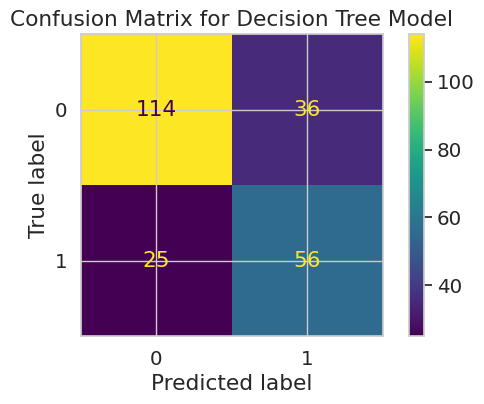

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(dt_conf_matrix, display_labels = dtc.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Decision Tree Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
train_knn = evaluasi_model(knn, X_train_smote, y_train_smote)
train_knn

0.8528571428571429

In [ ]:
test_knn = evaluasi_model(knn, X_test, y_test)
test_knn

0.7532467532467533

In [ ]:
# find confusion metrix 
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       150
           1       0.62      0.78      0.69        81

    accuracy                           0.75       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.78      0.75      0.76       231



In [ ]:
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)

knn_conf_matrix

array([[111,  39],
       [ 18,  63]])

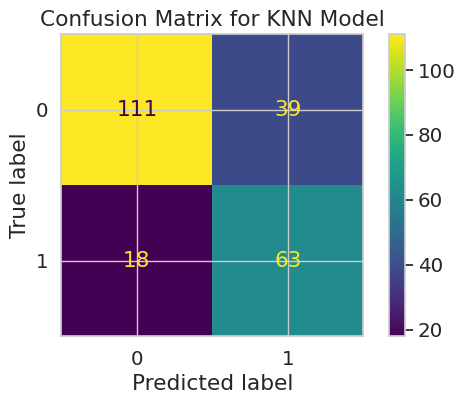

In [ ]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(knn_conf_matrix, display_labels = knn.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for KNN Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier 'rf' with number of tree 100
rf = RandomForestClassifier(n_estimators=99, max_depth=5, random_state=1)

# Fit dt to the training set
rf.fit(X_train_smote, y_train_smote)

<ipython-input-78-ff5ab237208e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_smote, y_train_smote)


RandomForestClassifier(max_depth=5, n_estimators=99, random_state=1)

In [ ]:
train_rf = evaluasi_model(rf, X_train_smote, y_train_smote)
train_rf

0.8585714285714285

In [ ]:
test_rf = evaluasi_model(rf, X_test, y_test)
test_rf

0.7662337662337663

In [ ]:
# find confusion metrix 
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       150
           1       0.64      0.78      0.70        81

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.78      0.77      0.77       231



In [ ]:
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

rf_conf_matrix

array([[114,  36],
       [ 18,  63]])

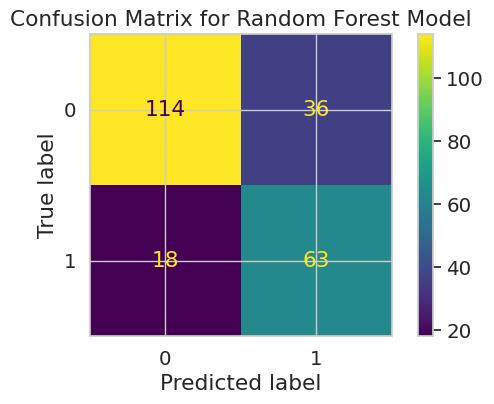

In [ ]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(rf_conf_matrix, display_labels = rf.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Random Forest Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

### SVM

In [ ]:
from sklearn.svm import SVC

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
svm_rbf = SVC(random_state=1, kernel='rbf',C=3)

# Fit dt to the training set
svm_rbf.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3, random_state=1)

In [ ]:
train_svm = evaluasi_model(svm_rbf, X_train_smote, y_train_smote)
train_svm

0.8914285714285715

In [ ]:
test_svm = evaluasi_model(svm_rbf, X_test, y_test)
test_svm

0.7316017316017316

In [ ]:
# find confusion metrix 
y_pred_svm_rbf = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred_svm_rbf))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       150
           1       0.61      0.67      0.64        81

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231



In [ ]:
svm_rbf_conf_matrix = confusion_matrix(y_test, y_pred_svm_rbf)

svm_rbf_conf_matrix

array([[115,  35],
       [ 27,  54]])

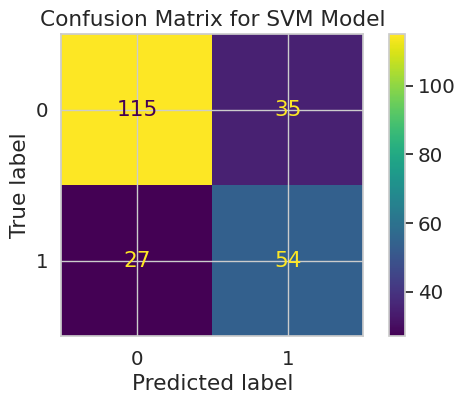

In [ ]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(svm_rbf_conf_matrix, display_labels = svm_rbf.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for SVM Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV 
lr = LogisticRegressionCV()
lr.fit(X_train_smote,y_train_smote) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or 

LogisticRegressionCV()

In [ ]:
train_lr = evaluasi_model(lr, X_train_smote, y_train_smote)
train_lr

0.84

In [ ]:
test_lr = evaluasi_model(lr, X_test, y_test)
test_lr

0.7575757575757576

In [ ]:
# find confusion metrix 
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       150
           1       0.65      0.67      0.66        81

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [ ]:
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)

lr_conf_matrix

array([[121,  29],
       [ 27,  54]])

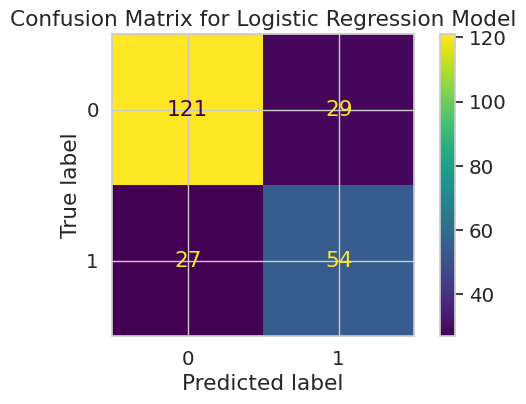

In [ ]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(lr_conf_matrix, display_labels = lr.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Logistic Regression Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [ ]:
train_xgb = evaluasi_model(xgb, X_train_smote, y_train_smote)
train_xgb

0.9114285714285715

In [ ]:
test_xgb = evaluasi_model(xgb, X_test, y_test)
test_xgb

0.7662337662337663

In [ ]:
# find confusion metrix 
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       150
           1       0.66      0.70      0.68        81

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



In [ ]:
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)

xgb_conf_matrix

array([[120,  30],
       [ 24,  57]])

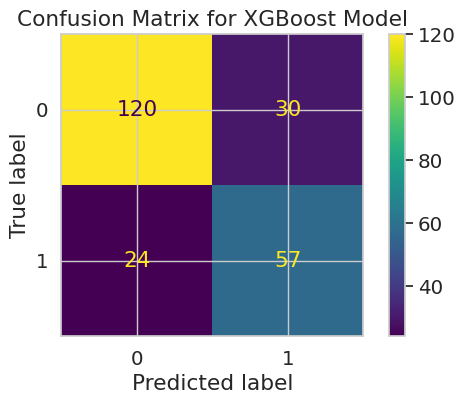

In [ ]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(xgb_conf_matrix, display_labels = xgb.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for XGBoost Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
train_gnb = evaluasi_model(gnb, X_train_smote, y_train_smote)
train_gnb

0.7085714285714285

In [ ]:
test_gnb = evaluasi_model(gnb, X_test, y_test)
test_gnb

0.6060606060606061

In [ ]:
# find confusion metrix 
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.94      0.42      0.58       150
           1       0.47      0.95      0.63        81

    accuracy                           0.61       231
   macro avg       0.70      0.69      0.60       231
weighted avg       0.78      0.61      0.60       231



In [ ]:
gnb_conf_matrix = confusion_matrix(y_test, y_pred_gnb)

gnb_conf_matrix

array([[63, 87],
       [ 4, 77]])

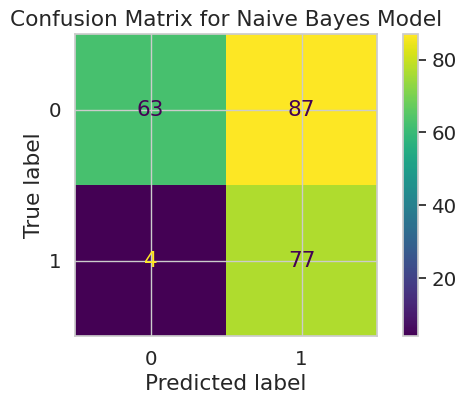

In [ ]:
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(gnb_conf_matrix, display_labels = gnb.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Naive Bayes Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

# Result

In [ ]:
result = {'Model' : ('Decision Tree','KNN','Random Forest','SVM','Logistic Regression','XGBoost','Naive Bayes'),
          'Train' : (train_dt, train_knn, train_rf, train_svm, train_lr, train_xgb, train_gnb),
          'Test' : (test_dt, test_knn, test_rf, test_svm, test_lr, test_xgb, test_gnb)}

df_result = pd.DataFrame(result)

In [ ]:
df_result.sort_values('Test', ascending=False, ignore_index=True)

,Model,Train,Test
0,Random Forest,0.858571,0.766234
1,XGBoost,0.911429,0.766234
2,Logistic Regression,0.840000,0.757576
3,KNN,0.852857,0.753247
4,Decision Tree,0.830000,0.735931
5,SVM,0.891429,0.731602
6,Naive Bayes,0.708571,0.606061
